# Homework 5

This homework is based on the data from the ThinkStats book.
We are looking at live births only and want to compare the relationship `totalwgt_lb ~ agepreg` between first born babies and others.


1. For the first born babies: Estimate a linear regression, modeling weight of the baby as a function of the mothers' age: .
    * Compute a $95 \%$ confidence interval for the slope.
    * Compute the RSS.
    * Predict the birth weight for a baby whose mothers' age is $30$.
    
2. Repeat the tasks above for the "others" (not-first born) and discuss the difference.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import scipy

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
#pregnancy data:
#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg = pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\pregNSFG.csv.gz")

#only look at live births
live = preg[preg.outcome == 1]
live.head()

,Unnamed: 0,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [6]:
firstborn = live[live["pregordr"] == 1].loc[:,["totalwgt_lb","agepreg"]]
laterborn = live[live["pregordr"] > 1].loc[:,["totalwgt_lb","agepreg"]]

Text(0.5, 1.0, 'Born later')

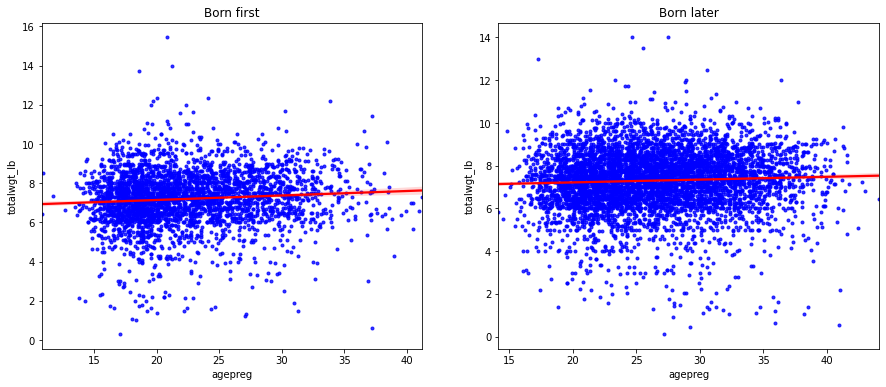

In [71]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
tmp=sns.regplot(x=firstborn["agepreg"], y=firstborn["totalwgt_lb"], order=1, ci=95, 
                scatter_kws={'color':'b', 's':9}, line_kws={'color':'r'})
plt.title("Born first")
plt.subplot(1,2,2)
tmp=sns.regplot(x=laterborn["agepreg"], y=laterborn["totalwgt_lb"], order=1, ci=95, 
                scatter_kws={'color':'b', 's':9}, line_kws={'color':'r'})
plt.title("Born later")

In [72]:
est = smf.ols('totalwgt_lb ~ agepreg', firstborn).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.6906,0.111,60.299,0.000,6.473,6.908
agepreg,0.0229,0.005,4.745,0.000,0.013,0.032


In [219]:
#residuals are y_found - y_predicted
weight_firstborn = np.array(firstborn["totalwgt_lb"]) #this is used to reset the index in regular orders 
weight_firstborn = weight_firstborn[np.logical_not(np.isnan(weight_firstborn))] #drop all nan-values
agepreg_firstborn = np.array(firstborn["agepreg"]) #see above
agepreg_firstborn = agepreg_firstborn[np.logical_not(np.isnan(agepreg_firstborn))] #drop all nan-values
residuals = np.empty(len(weight_firstborn))

for i in range(len(weight_firstborn)):
    residuals[i] = (weight_firstborn[i] - 6.6906 - (0.0229 * agepreg_firstborn[i]))**2


RSS = np.sum(residuals)
RSS

6676.320027576743

In [105]:
#calculate prediction for x = 30
6.6906 + 0.0229 * 30

7.3776

* 95% CI for the Slope = [0.013, 0.032]
* RSS = 6676.320
* Prediction for age = 30 -> 7.3776 lbs

In [73]:
est = smf.ols('totalwgt_lb ~ agepreg', laterborn).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.9560,0.094,74.008,0.000,6.772,7.140
agepreg,0.0131,0.003,3.749,0.000,0.006,0.020


In [232]:
#residuals are y_found - y_predicted
weight_laterborn = np.array(laterborn["totalwgt_lb"]) #this is used to reset the index in regular orders 
weight_laterborn = weight_laterborn[np.logical_not(np.isnan(weight_laterborn))] #drop all nan-values
agepreg_laterborn = np.array(laterborn["agepreg"]) #see above
agepreg_laterborn = agepreg_laterborn[np.logical_not(np.isnan(agepreg_laterborn))] #drop all nan-values
residuals = np.empty(len(weight_laterborn))

for i in range(len(weight_laterborn)):
    residuals[i] = (weight_laterborn[i] - 6.6906 - (0.0229 * agepreg_laterborn[i]))**2


RSS = np.sum(residuals)
RSS

11310.483188191767

In [233]:
#calculate the prediction for x = 30
6.9560 + 0.0131 * 30

7.349

* 95% CI for the Slope = [0.006, 0.020]
* RSS = 11310.483
* Prediction for age = 30 -> 7.349 lbs